#**Deep Learning Homework 1: *from the Perceptron to DNN***
### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---

In this first homework, we are going to write our own simple feedforward neural network using `Python` and `NumPy` (the standard numeric library for Python). We will start by implementing just a simple neuron, or perceptron, then we define the training algorithm for this simple model.
The second part consists in defining a simple neural network to perform digits classification.

## Exercise 1.1: Perceptron

In this first exercise, we will implement a simple neuron, or perceptron, as described below. We will have just three inputs and one output neuron (we omit the bias term for now).
Notice how the perceptron simply performs a sum of the individual inputs multiplied by the corresponding weights mapped through an activation function $f(\cdot)$.  This can also be expressed as a dot product of the weight vector $\textbf{W}$ and the input vector $\textbf{x}$, thus: $$\hat{y}=f(\textbf{W}^T \textbf{x})$$

We will begin by implementing the perpetron by using the [numpy](https://docs.scipy.org/doc/numpy/reference/) library:

In [1]:
import numpy as np

### Training data

Let's consider a very simple dataset. The dataset is made of four input vectors $\textbf{x} \in \mathbb{R}^3$ and the corresponding desired target values $y$. In the table below, each row is a single sample; the first three columns are the input vector components, whereas the last column is the target output.

||Input|     |    Output|
|:----:|:---:|:---:|---:|
| 1    | 1   | 0   | 0  |
| 1    | 0   | 0   | 0  |
| 0    | 1   | 0   | 1  |
| 0    | 0   | 0   | 1  |

Notice that our target outputs are equal to the opposite of the first component of the input, therefore the task that the model should learn is very simple. We will see how the perceptron is able to learn that starting from this toy dataset.

Now let's define the `X` and `y` matrices:

In [2]:
# Our input data is a matrix, each row is one input sample
X = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])
    
# The target output is a column vector in 2-D array format (.T means transpose)
y = np.array([[0,0,1,1]]).T

print('X =',X)
print('y =',y)

X = [[1 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
y = [[0]
 [0]
 [1]
 [1]]


### Activation function

As we said before, in order to define a perceptron we need to define the activation function $f(\cdot)$. There are many possibile activation function that can be used, let's plot some of the most common ones:




In [3]:
import matplotlib.pyplot as plt 

x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='ReLu')
plt.plot(x, 1/(1+np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.1])
plt.title('Some Activation Functions')
plt.grid(True)
l = plt.legend()
plt.show()

# Delete temporary variables, so not to cause any confusion later :-)
del x, l

<Figure size 640x480 with 1 Axes>

In this particular exercise we will use the sigmoid function. So let's define $f(\cdot)$ as the sigmoid function

$$f(x)=\sigma(x)=\frac{1}{1+\exp^{-x}}$$

In [4]:
def f(x):
    # Sigmoid function
    return 1 / ( 1 + np.exp(-x) )

### Weight initialization

Now we have to initialise the weights. Let's initialize them randomly, so that their mean is zero. The weights matrix maps the input space into the output space, therefore in our case $\mathbf{W} \in \mathbb{R}^{3 \times 1}$

In [5]:
# fix random seed for reproducibility
np.random.seed([42])

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W = 2 * np.random.random((3,1)) - 1

print('W =', W)

W = [[ 0.2788536 ]
 [-0.94997849]
 [-0.44994136]]


### Forward propagation

Next, let's try to implement one round of forward propagation.  This means taking an input sample and moving it forward through the network, calculating the output of the network eventually.

For our single neuron this is simply $\hat{\mathbf{y}} = f(\mathbf{W}^T \mathbf{x})$, where $\mathbf{x}$ is one input vector.

each input sample is arranged as a row of the matrix `X`, therefore we can access the first row by `X[0]`. Let's store it in the variable `X0` for easier access. We'll use `reshape` to make sure it's expressed as a column vector.

In [6]:
X0 = np.reshape(X[0], (3,1))
print(X0)

[[1]
 [1]
 [0]]


The output $\hat{y}$ for the first input can be calculated according to the formula given above

In [7]:
y_out = f(np.dot(W.T, X0))

print('y_out =', y_out)

y_out = [[0.338245]]


the target result is stored in `y[0]`.  If you check back, you can see we defined it to be $y_0=0$. You can see that our network is pretty far away from the right answer... this is why we need to backpropagate the error, to adjust the weights in the right direction!

### Backpropagation

The following step is updating the weights by propagating the error backwards in the network.  How this is done depends on the activation function, and namely on its derivative. The activation function of the considered model is the sigmoid, and its derivative is:

$$\sigma(x)'=\sigma(x) \cdot (1-\sigma(x))$$

Recall that the weight update is given as $\Delta w_{ji} = -\epsilon \delta_j x_i$.
Our network has only one layer, so $x_i$ is just the input $\mathbf{x}$, and a single output neuron so there is no actual need for index $j$. 

In matrix form we can calculate this for all the weights:

$$\Delta \textbf{W} = -\epsilon \delta \textbf{x}_0$$
where $\delta$ is the gradient (called `grad` in the following code; see the lecture material for its derivation), $ϵ$ is the learning rate, and $\textbf{x}_0$ is our first input sample in variable `X0`.

Recall that $y$ is the desired output, i.e. `y[0]` in this Python code, and $\hat{y}$ is called `y_out` here.

In [8]:
# the learning rate determines the step size in the gradient descent, you can experiment with different values if you want
learning_rate = 0.5

# compute the gradient term
grad = (y_out - y[0]) * y_out * (1 - y_out) #(t - z) * derivative of sigmoid

# Calculate the weight update
W_delta = - learning_rate * grad * X0

print(W_delta)

# Update the weights
W += W_delta

[[-0.03785559]
 [-0.03785559]
 [-0.        ]]


Let's try a forward propagation again with the same input.

In [9]:
y_out=f(np.dot(W.T, X0))

print('y_out=', y_out)

y_out= [[0.3215111]]


You should notice that the result has moved (slightly!) towards the correct answer, that is zero. In order to converge to the right value we have to perform more iterations!

### Training iterations [TO COMPLETE]

Let's define a complete training procedure for our model. In each iteration we have to perform the forward propagation, then we'll check how much the output differs from the target and propagate the error back (backward propagation).  We'll do this for each sample data point and then iterate this over and over again using a for loop.

In [10]:
# For the training we need to iterate over the dataset several times
num_iters = 1000

# We'll also store the mean square error (MSE) in every round so we can see how it evolves
# mse is just an array to store these values at each round:
mse = np.zeros(num_iters)

# Looping for the iterations
for it in range(num_iters):
    
    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        # Get the correponding target value
        y_target = y[n]
        
        # Forward propagation of the n_th sample
        y_out = f(np.dot(W.T, x_n))

        # Let's keep track of the sum of squared errors
        mse[it] += (y_target - y_out)**2 # [TO COMPLETE] compute squared error between y_target and y_out
    
        # compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) 
    
        # Calculate the weights update
        W_delta = - learning_rate * grad * x_n

        # Update the weights
        W += W_delta

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Now let's see the output for each input sample with the trained weights
# Using batch mode (see next section) we can do this in a single line
print("Output after training, y_out")
y_out = f(np.dot(X, W))
print(y_out)
print("Target output, y")
print(y)

Output after training, y_out
[[0.04884685]
 [0.0032833 ]
 [0.93972279]
 [0.5       ]]
Target output, y
[[0]
 [0]
 [1]
 [1]]


After the training phase, the output of the network is fairly close to the target output.
Notice how for the fourth input sample, the zero vector, this training procedure without the bias term does not update the corresponding weights and always gives $$\hat{y}_4 = f(\textbf{W}^T \textbf{x}_4)= f(0) = \frac{1}{2} $$

How many iterations were required in order to obtain this result? We have set the number of the iteration to $1000$, but it is interesting to investigate the trend of the error trought the training. In the next homework, we will discuss how to select the right number of iterations (also known as *epochs*), for now let's just plot its behaviour:

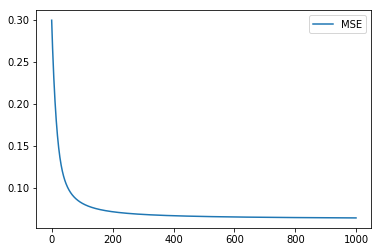

In [11]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
l = plt.legend()
plt.show()

You should see the error going down pretty quickly at the beginning and then slowing down.

### Batch training

With real-world data it is unefficient to handle each example one-by-one like we did above.  Instead, one typically uses a set, so called *mini-batch*, of several input examples at once.

Let's consider a subset $\tilde{\textbf{X}} ⊆ \textbf{X}$ of samples from the training set. Each of these samples is one row in $\tilde{\textbf{X}}$, instead of a single column vector as before. The forward propagation step looks a bit different mathematically: $\hat{\textbf{y}} = f(\tilde{\textbf{X}}\textbf{W})$.

Our whole dataset can be forward propagated without a for loop:

In [12]:
y_out = f(np.dot(X, W))
print(y_out)

[[0.04884685]
 [0.0032833 ]
 [0.93972279]
 [0.5       ]]


so we will get the corresponding output (each value in `y_out`) for each input (each row in `X`) in single matrix multiplication.  The error and weight updates can all be calculated in a single go, using matrix multiplications similarly to the steps we did above with single vectors.

However, in these exercises we'll stick to looping over one sample at a time, as the batch training mode makes it a bit more complicated to understand and does not lead to any significant speed advantage.

## Exercise 1.2: The XOR problem

Now let's try a slightly more difficult example. We'll use the same input data, but a different desired output. 

||Input|     |    Output|
|:----:|:---:|:---:|---:|
| 1    | 1   | 0   | 0  |
| 1    | 0   | 0   | 1  |
| 0    | 1   | 0   | 1  |
| 0    | 0   | 0   | 0  |

In particular, the new input-output configuration represents the XOR problem (between the first two components). This problem is interesting because it can not be solved by using a single layer perceptron. Indeed, you will need (at least) a two-layer network to solve it.
In this exercise we will first show that the network that we defined in the previous exercise can not solve the XOR problem,  then we will define a two-layer perceptron able to compute the correct solution.

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed([42])

X = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])
    
y = np.array([[0,1,1,0]]).T

As we did in the previous exercise, let's initialize the weights and define the activation function (also in this exercise we will use the sigmoid function).

In [14]:
# Weights initialization
W = 2 * np.random.random((3,1)) - 1

# Activation function
def f(x):
    return 1 / (1+np.exp(-x))

Now let's run the network defined in Exercise 1.1 to check whether it is able to solve the XOR problem.

In [15]:
num_iters = 1000
learning_rate = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]
        
        # Forward propagation
        y_out = f(np.dot(W.T, x_n))

        # Compute the Gradient
        grad = (y_out - y_target)*y_out*(1 - y_out)
    
        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta


# Now let's see the output for each input sample with the trained weights
# Using batch mode we can do this in a single line
y_out = f(np.dot(X, W))
print("Output after training, y_out")
print(y_out)
print("Desired output, y")
print(y)

Output after training, y_out
[[0.51063175]
 [0.50531648]
 [0.50531648]
 [0.5       ]]
Desired output, y
[[0]
 [1]
 [1]
 [0]]


### Two layers network [TO COMPLETE]
As you can see the network is not able to solve the problem, it's not even close! Indeed, it's just predicting $0.5$ for all the inputs. You could try to increase the number of iterations but it won't help either.
Let's add a single hidden layer, for example with 4 hidden nodes (you can try out and change this number as well).
The input to the network is a vector $\mathbf{x}$ as before.  The first hidden layer calculates $\textbf{h} = f(\textbf{W}_1^T\mathbf{x})$ (note that now $\textbf{W}_1 \in \mathbb{R}^{3 \times 4}$).  The output layer computes $\hat{y} = f(\textbf{W}_2^T\textbf{h})$. Remember that $\hat{y}$ is called `y_out` in th code, while ${W}_2 \in \mathbb{R}^{4 \times 1}$.

As usual, we'll start by initializing the weights randomly:

In [16]:
num_hidden = 4

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W_1 = 2 * np.random.random((3,num_hidden)) - 1
W_2 = 2 * np.random.random((num_hidden,1)) - 1

We have to define the training procedure in order to train the two-layers neural network:

In [17]:
x_n = np.random.random((3,1))
print(x_n)
arr = np.zeros(18)
for i in range(3):
    arr[i] = x_n[i]
    arr[-(i+1)]= x_n[-(i+1)]
    
arr = np.reshape(arr,(3,6))
print(arr.shape)

[[0.00649876]
 [0.80581925]
 [0.69813939]]
(3, 6)


In [18]:
print(tempi)
print(W_2)

NameError: name 'tempi' is not defined

In [19]:
num_iters = 1000
learning_rate = 0.5

mse = np.zeros(num_iters)

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]        
        
        # Forward propagation
        h = f(np.dot(W_1.T,x_n))# [TO COMPLETE] Calculate h
    
        y_out = f(np.dot(W_2.T,h))# [TO COMPLETE] Calculate y_out
        
        # Let's keep track of the sum of squared errors
        mse[it] += (y_target - y_out)**2 #[TO COMPLETE]: compute squared error between y_target and y_out

        # [TO COMPLETE] Compute the gradient       
        # hint: you can do this by performing a for loop over i (hidden nodes) and k (input nodes) and calculate 
        # each W_1_ik update separately
        
        grad2 = np.dot((y_out - y_target) * y_out * (1-y_out),h.T)
        grad1 = np.dot((np.dot(np.dot(((y_out - y_target) * y_out * (1-y_out)),W_2.T) ,(h*(1-h)))).T,x_n.T)
        
        for i in range(num_hidden):
            for k in range(len(x_n)):
                tempi = grad2 * x_n 
                W_2[i] = W_2[i] - learning_rate * tempi[k][i]
                W_1[k][i] =  W_1[k][i] - learning_rate * grad1.T[k]
                
                
        
         
        # [TO COMPLETE] Update the weights
        # Note: it's important the W weights are updated at the end,
        # the above calculation should be done with the old weights
        

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

y_out = f(np.dot(f(np.dot(X, W_1)), W_2))
print("Output after training, y_out")
print(y_out)
print("Target output, y")
print(y)

Output after training, y_out
[[0.11487607]
 [0.90232138]
 [0.49266439]
 [0.77261997]]
Target output, y
[[0]
 [1]
 [1]
 [0]]


Now you should see outputs very similar to the desired ones!
Finaly, let's plot again the MSE behaviour:

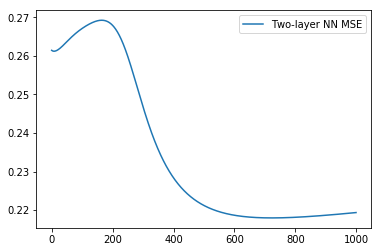

In [20]:
plt.figure()
plt.plot(range(num_iters), mse, label="Two-layer NN MSE")
l = plt.legend()
plt.show()

## Exercise 1.3: Handwritten digits classification
In this exercise, we try to apply what we learned in the previous exercise in a real-world scenario. In particular, we consider a simple digits classification problem. The model turns out to be similar to the perceptron implemented in Exercise 1.1, but here we will use softmax activation function and cross-entropy loss function. The idea is to create a model that has in input an image of a handwritten digit and that return a vector of 10 probabilities (one for each possible digit 0 - 9). 

### Dataset
The dataset that we will use in this exercise is included in [scikit-learn](https://scikit-learn.org/stable/), one of the major Machine Learning libraries. The dataset is called `load_digits` and contains several hundreds of samples. Each datapoint is made of the handwritten digit image (or rather its 8x8 pixel representation), that will be the input of our model, and the target digit value. 

Let's start by plotting one of this handwritten digit:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:532: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int)


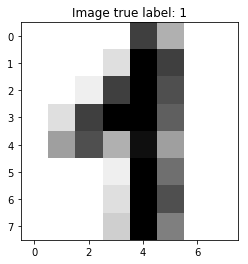

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

np.random.seed([42])

digits = load_digits()

sample_index = 42
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("Image true label: %d" % digits.target[sample_index])
plt.show()

It is better to check how an input in the dataset $\mathbf{X}$ and its related target $\mathbf{y}$ are represented in the dataset:

In [115]:
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print("X:",data)
print("y:",target)

X: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y: [0 1 2 ... 8 9 8]


So essentialy the dataset is a matrix with the (color) values for each pixel and for each image, whereas the target is the digit itself.

#### One-hot encoding
In order to have a representation of the target that will be similar to the output of the model (i.e. $\hat{y}=0$ or $1$), we will use one-hot encoding. Basically, the one-hot encoding allow us to encode a categorical integer feature using a one-of-K scheme, where each class is translated to a specific index of an array.

In [116]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

For example, if there are 10 classes in total and a sample belongs to class number 3, we can translate the output to the following lenght-ten array of 0 and 1 (class 3 is in the fourth index because we start counting from zero!):

In [117]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Activation Function: Softmax [TO COMPLETE]
As activation function we will use the Softmax function: this particular function is very useful when we have to deal with multiclassification tasks and one-hot target because it turns numbers, a.k.a. logits (pre-activations), into $m$ probabilities that sum to one. Basically, Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.
$$
softmax(\mathbf{x})_j = \frac{e^{x_j}}{\sum_{i=1}^{m}{e^{x_i}}}
$$
In our case we have in input a matrix $\mathbf{X}$ where each row is a vector $\mathbf{x}$, therefore the softmax function that we have to implements will be mathematically defined as:
$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{m}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_m}
\end{bmatrix}
$$


In [118]:
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

### Loss Function: Cross Entropy ###
Usually, a neural network classifier that use the softmax function in the final layer is trained using Cross-Entropy as loss function:
$$H(P,Q)=-E_{x \sim P}[log \;Q(x)]$$

In [119]:
EPSILON = 1e-8 # this is needed for numerical stability

def cross_entropy(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred) # make sure the dimensions are right
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

### Weights Initailiazation

Similarly to what we did in previous exercises, we have to initialize the weights but in this case we will consider the bias term as well. Therefore we define the weights $\mathbf{W}\in\mathbb{R}^{m \times n}$ and the bias $\mathbf{b}\in\mathbb{R}^m$, where $n$ is the input size and $m$ is the number of classes.
Now we can define the output of our model as

$$\hat{\mathbf{y}}=softmax(\textbf{W} \textbf{x}+\mathbf{b})$$



In [120]:
np.random.seed([42])

input_size = data.shape[1]
n_classes = len(np.unique(target))

W = np.random.uniform(size=(input_size,n_classes), high=0.1, low=-0.1)
b = np.random.uniform(size=n_classes, high=0.1, low=-0.1)

Let's consider a sample from the training set, and plot the current (and incorrect) output prediction probability of our model before training it.

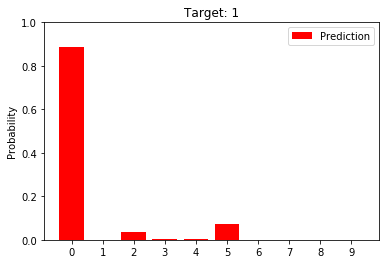

In [121]:
y_out = softmax(np.dot(data[sample_index], W) + b)

plt.bar(range(n_classes), y_out, label="Prediction", color="red")
plt.ylim(0,1,0.1)
plt.xticks(range(n_classes))
plt.legend()
plt.ylabel("Probability")
plt.title("Target: " + str(target[sample_index]))
plt.show()

### Training procedure [TO COMPLETE]:
As in the previous exercise let's define a training procedure. Note that in this case, we have to compute the gradient according to the softmax function and the loss function that the training has to optimize. 

Hence, the gradient for the weights $\textbf{W}$ is:

$\nabla_W=(\mathbf{\hat{y}}-\mathbf{y}) \cdot \mathbf{x}$

while for the bias is:

$\nabla_b=(\mathbf{\hat{y}}-\mathbf{y})$

During the training procedure let's also compute the accuracy of the predictions and the loss value at each iteration:



In [123]:
num_iters = 50
learning_rate = 0.0005

for it in range(num_iters):
    iteration_accuracy = []
    iteration_loss = []
    for i, (X, y) in enumerate(zip(data, target)):

        # Forward propagation
        y_out = softmax(np.dot(X,W) + b)  #[TO COMPLETE] compute forward propagation using the softmax 
                # function previously defined as activation function

        #Evaluate the output error
        pred_err = y_out - one_hot(n_classes, y)

        temp = y_out - one_hot(n_classes, y)
        temp = temp.reshape(1,10)
        X = X.reshape(64,1)
        gradW = np.dot(X,temp)
        gradB = y_out - one_hot(n_classes, y)
        # [TO COMPLETE] Compute the gradient (for the weights and the bias)
        W = W - (learning_rate * gradW)
        b = b - (learning_rate * gradB)
        # [TO COMPLETE] Update the weights and the bias
        # Note: it's important the weights W and the bias b are updated at the end
        # the above calculation should be done with the old weights

        iteration_accuracy.append(np.argmax(y_out) == y)
        iteration_loss.append(cross_entropy(one_hot(n_classes,y), y_out))

    print("iteration: ", it, " -- accuracy: ", np.mean(np.asarray(iteration_accuracy)), " -- loss: ", np.mean(iteration_loss))

iteration:  0  -- accuracy:  0.8291597106288259  -- loss:  0.5599306985767774
iteration:  1  -- accuracy:  0.9504730105731776  -- loss:  0.17891855483306038
iteration:  2  -- accuracy:  0.9660545353366722  -- loss:  0.13731040143026943
iteration:  3  -- accuracy:  0.9699499165275459  -- loss:  0.11657311809302359
iteration:  4  -- accuracy:  0.9727323316638843  -- loss:  0.10309576643150416
iteration:  5  -- accuracy:  0.9755147468002225  -- loss:  0.09324272062785703
iteration:  6  -- accuracy:  0.9766277128547579  -- loss:  0.08555923701633708
iteration:  7  -- accuracy:  0.9782971619365609  -- loss:  0.0793208069402833
iteration:  8  -- accuracy:  0.9788536449638287  -- loss:  0.07411845534658526
iteration:  9  -- accuracy:  0.9816360601001669  -- loss:  0.06969679545124284
iteration:  10  -- accuracy:  0.9833055091819699  -- loss:  0.06588294465378018
iteration:  11  -- accuracy:  0.9844184752365053  -- loss:  0.06255354264270525
iteration:  12  -- accuracy:  0.9860879243183083  --

As you can see during the training the accuracy increases after each iteration, while the loss function value progressively declines.

Finally, let's check how the prediction capability of our model changes after the training:

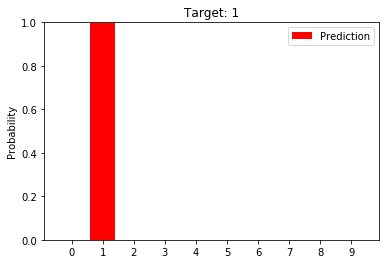

In [124]:
y_pred = softmax(np.dot(data[sample_index], W) + b)
plt.bar(range(n_classes), y_pred, label="Prediction", color="red")
plt.ylim(0, 1, 0.1)
plt.xticks(range(n_classes))
plt.legend()
plt.ylabel("Probability")
plt.title("Target: " + str(target[sample_index]))
plt.show()